In [497]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [498]:
laptop_data = pd.read_csv('laptop_price.csv', encoding="latin-1")

In [499]:
laptop_data = laptop_data.drop(["laptop_ID", "Product"], axis=1)

In [500]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price_euros       1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [501]:
laptop_data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [502]:
laptop_data = laptop_data.join(pd.get_dummies(laptop_data.Company))
laptop_data = laptop_data.drop("Company", axis=1)

In [503]:
laptop_data = laptop_data.join(pd.get_dummies(laptop_data.TypeName))
laptop_data = laptop_data.drop("TypeName", axis=1)

In [504]:
laptop_data["ScreenResolution"] = laptop_data.ScreenResolution.str.split(" ").apply(lambda x:x[-1])

In [505]:
laptop_data["laptop_height"] = laptop_data["ScreenResolution"].str.split("x").apply(lambda x:x[0]).astype("int")
laptop_data["laptop_width"] = laptop_data["ScreenResolution"].str.split("x").apply(lambda x:x[1]).astype("int")

In [506]:
laptop_data = laptop_data.drop(columns="ScreenResolution")

In [507]:
laptop_data["Weight"] = laptop_data.Weight.str.split("kg").apply(lambda x:x[0]).astype("float")

In [508]:
laptop_data["Storage_Type"] = laptop_data.Memory.str.split(" ").apply(lambda x:x[-1])

In [509]:
laptop_data["Ram"] = laptop_data.Ram.str.split("GB").apply(lambda x:x[0]).astype("int")

In [510]:
laptop_data["Memory"] = laptop_data.Memory.str.split(" ").apply(lambda x:x[0])

In [511]:
laptop_data["Storage_Type"] = laptop_data.Storage_Type.apply(lambda x:x[-2:])

In [512]:
import re
laptop_data['Memory'] = laptop_data['Memory'].apply(lambda x: re.findall(r'\d+', x)).apply(lambda x:x[0])

In [513]:
laptop_data

,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,Apple,...,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,laptop_height,laptop_width,Storage_Type
0,13.3,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,...,0,0,0,0,0,1,0,2560,1600,SD
1,13.3,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34,898.94,0,1,...,0,0,0,0,0,1,0,1440,900,ge
2,15.6,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,1.86,575.00,0,0,...,0,0,0,0,1,0,0,1920,1080,SD
3,15.4,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,...,0,0,0,0,0,1,0,2880,1800,SD
4,13.3,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,...,0,0,0,0,0,1,0,2560,1600,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,Intel Core i7 6500U 2.5GHz,4,128,Intel HD Graphics 520,Windows 10,1.80,638.00,0,0,...,0,1,0,0,0,0,0,1920,1080,SD
1299,13.3,Intel Core i7 6500U 2.5GHz,16,512,Intel HD Graphics 520,Windows 10,1.30,1499.00,0,0,...,0,1,0,0,0,0,0,3200,1800,SD
1300,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64,Intel HD Graphics,Windows 10,1.50,229.00,0,0,...,0,0,0,0,1,0,0,1366,768,ge
1301,15.6,Intel Core i7 6500U 2.5GHz,6,1,AMD Radeon R5 M330,Windows 10,2.19,764.00,0,0,...,0,0,0,0,1,0,0,1366,768,DD


In [514]:
laptop_data = laptop_data.join(pd.get_dummies(laptop_data.Storage_Type))
laptop_data = laptop_data.drop("Storage_Type", axis=1)

In [515]:
laptop_data["Cpu_frequency"] = laptop_data.Cpu.str.split(" ").apply(lambda x:x[-1])
laptop_data["Cpu_brand"] = laptop_data.Cpu.str.split(" ").apply(lambda x:x[0])
laptop_data = laptop_data.drop("Cpu", axis=1)

In [516]:
laptop_data["Cpu_frequency"] = laptop_data.Cpu_frequency.str.split("GHz").apply(lambda x:x[0]).astype("float")

In [517]:
laptop_data.drop(1191, inplace=True)

In [518]:
laptop_data = laptop_data.reset_index(drop=True)

In [519]:
laptop_data = laptop_data.join(pd.get_dummies(laptop_data.Cpu_brand))
laptop_data = laptop_data.drop("Cpu_brand", axis=1)

In [520]:
laptop_data["Gpu_brand"] = laptop_data.Gpu.str.split(" ").apply(lambda x:x[0])
laptop_data = laptop_data.drop("Gpu", axis=1)

In [521]:
laptop_data = laptop_data.join(pd.get_dummies(laptop_data.Gpu_brand, prefix='gpu'))
laptop_data = laptop_data.drop("Gpu_brand", axis=1)

In [522]:
laptop_data["Memory"] = laptop_data["Memory"].astype("int")

In [523]:
laptop_data = laptop_data.join(pd.get_dummies(laptop_data.OpSys, prefix='OpSys'))
laptop_data = laptop_data.drop("OpSys", axis=1)

In [524]:
laptop_data.to_csv("cleaned_laptop_data.csv", index=False)

In [525]:
pc_data = pd.read_csv("cleaned_laptop_data.csv")

In [526]:
X = pc_data.drop('Price_euros', axis=1)
y = pc_data["Price_euros"]

In [539]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=72, test_size=0.2)

In [540]:
rf_regressor = RandomForestRegressor()

In [541]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [542]:
y_pred = rf_regressor.predict(X_test)

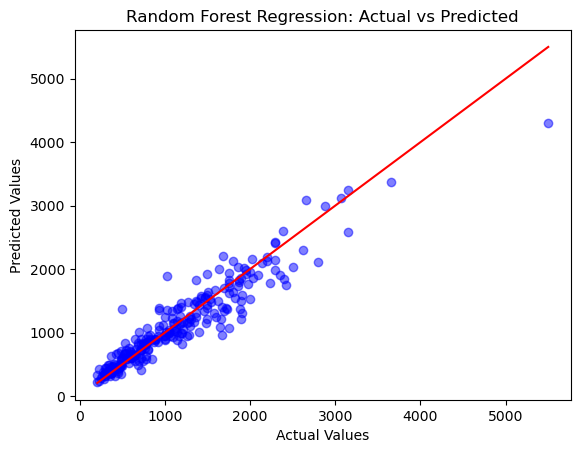

In [545]:
# Plotting the predicted values vs actual values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Plotting the 45-degree line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.show()

In [544]:
r2_score(y_test, y_pred)

0.8915503258435407